
The main interest of the study is on the difference between the varied and constant training conditions, but the effect of catOrder and feedbacktype will also need to be considered.
# Introduction In project 1, we applied model-based techniques to quantify and control for the
similarity between training and testing experience, which in turn enabled us to
account for the difference between varied and constant training via an extended
version of a similarity based generalization model. In project 2, we will go a
step further, implementing a full process model capable of both 1) producing
novel responses and 2) modeling behavior in both the learning and testing stages
of the experiment. Project 2 also places a greater emphasis on extrapolation performance following
training - as varied training has often been purported to be particularly beneficial in such situations. Extrapolation has long been a focus of the literature on function learning [@brehmerHypothesesRelationsScaled1974;
@carrollFunctionalLearningLearning1963]. Central questions of the function learning literature have included the relative difficulties of learning various functional forms (e.g. linear vs.bilinear vs. quadratic), and the relative
effectiveness of rule-based vs. association-based exemplar models vs. various hybrid models
[@bottNonmonotonicExtrapolationFunction2004;
@deloshExtrapolationSineQua1997; @jonesActiveFunctionLearning2018;
@kalishPopulationLinearExperts2004; @mcdanielConceptualBasisFunction2005;
@mcdanielPredictingTransferPerformance2009]. However the issue of training variation has received surprisingly little attention in this area. 
# Methods
## Participants
Data was collected from 647 participants (after exclusions). The results shown
below consider data from subjects in our initial experiment, which consisted of
196 participants (106 constant, 90 varied). The follow-up experiments entailed
minor manipulations: 1) reversing the velocity bands that were trained on vs.
novel during testing; 2) providing ordinal rather than numerical feedback during
training (e.g. correct, too low, too high). The data from these subsequent
experiments are largely consistently with our initial results shown below.
## Task
We developed a novel visuomotor extrapolation task, termed the ["Hit The Wall"
(HTW]{.underline}) task, wherein participants learned to launch a projectile
such that it hit a rectangle at the far end of the screen with an appropriate
amount of force (specified by the velocity band values). Although the projectile had both x and y velocity components,
only the x-dimension was relevant for the task. On each trial, we record the vx and vy 
produced by the participant. We calculate the distance between the vx value and the closest edge of the current velocity band. Note that lower distance values correspond to better performance. 
## Design (expMode in dataframe)
### training stage
1)  train - 90 training trials split evenly divided between velocity bands.
    Varied training with 3 velocity bands and Constant training with 1
    band.
2)  train-Nf - interleaved no feedback testing that happens throughout training
### Testing Stage
1)  No-feedback testing from 3 novel extrapolation bands. 15 trials
    each. (test-Nf)
2)  No-feedbacd testing from the 3 bands used during the training phase
    (2 of which were novel for the constant group). 9 trials each. (test-train-Nf)
3)  Feedback testing for each of the 3 extrapolation bands. 10 trials
    each. (test-feedback)
The is also a between subjects order manipulation (catOrder). In the orig condition, constant subjects train on band 800-1000, and varied subjects train on bands 800-1000, 1000-1200, and 1200-1400. In the rev condition, constant subjects train on band 600-800, and varied subjects train on bands 600-800, 350-550, and 100-300. 
There is also the feedbackType between subjects manipulation. Subjects in the continuous condition receive condition feedback, and subjects in the ordinal condition receive ordinal feedback. 
d <- readRDS('dPrune-01-19-23.rds')
colnames(d)
 [1] "id" "sbjCode""condit""trial""nGoodTrial""goodThrow""gt.bandStage""expMode"      "gt.stage"[10] "gt.train" "trainStage"  "expStage""band" "input" "vb" "bandInt"      "lowBound" "highBound" "feedback" "fb""runTotal" "mode" "stage" "catOrder"     "dist"      "vx" "vxb" "vxi"  "vy" "nTrain" "nTestNf""nInt" "nTestF"  "nTotal"       "lastTrain"    "lastTrial""trainVec"     "feedbackType" "fullCond"    



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
data = pd.read_csv('dPrune-01-19-23.csv')

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,id,sbjCode,condit,trial,nGoodTrial,goodThrow,gt.bandStage,expMode,gt.stage,...,nTrain,nTestNf,nInt,nTestF,nTotal,lastTrain,lastTrial,trainVec,feedbackType,fullCond
0,1,1,42367,Varied,2,1,True,1,train,1,...,86,45,26,27,202,112,202,"c(5, 6, 7)",continuous,varied.trainFirst.orig.continuous
1,2,1,42367,Varied,3,2,True,1,train,2,...,86,45,26,27,202,112,202,"c(5, 6, 7)",continuous,varied.trainFirst.orig.continuous
2,3,1,42367,Varied,4,3,True,1,train,3,...,86,45,26,27,202,112,202,"c(5, 6, 7)",continuous,varied.trainFirst.orig.continuous
3,4,1,42367,Varied,5,4,True,2,train,4,...,86,45,26,27,202,112,202,"c(5, 6, 7)",continuous,varied.trainFirst.orig.continuous
4,5,1,42367,Varied,6,5,True,2,train,5,...,86,45,26,27,202,112,202,"c(5, 6, 7)",continuous,varied.trainFirst.orig.continuous


In [4]:
# Descriptive statistics
data.describe(include='all')

,Unnamed: 0,id,sbjCode,condit,trial,nGoodTrial,goodThrow,gt.bandStage,expMode,gt.stage,...,nTrain,nTestNf,nInt,nTestF,nTotal,lastTrain,lastTrial,trainVec,feedbackType,fullCond
count,85042.000000,85042.000000,85042.000000,85042,85042.000000,85042.000000,85042,85042.000000,85042,85042.000000,...,85042.000000,85042.000000,85042.000000,85042.000000,85042.00000,85042.000000,85042.00000,85042,85042,85042
unique,NaN,NaN,NaN,2,NaN,NaN,1,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,14
top,NaN,NaN,NaN,Constant,NaN,NaN,True,NaN,train,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,continuous,constant.testFirst.orig.ordinal
freq,NaN,NaN,NaN,46223,NaN,NaN,85042,NaN,36760,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25523,48380,9567
mean,42521.500000,213.857717,52448.308212,NaN,104.920040,100.140895,NaN,16.495508,NaN,28.106101,...,86.136721,43.835669,25.709508,26.310988,199.28179,111.846229,199.28179,NaN,NaN,NaN
std,24549.655133,123.305115,4094.349306,NaN,59.264385,57.594970,NaN,20.176990,NaN,22.763486,...,2.687424,1.417239,1.710335,1.223385,4.83393,3.566911,4.83393,NaN,NaN,NaN
min,1.000000,1.000000,42367.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,...,80.000000,40.000000,18.000000,19.000000,177.00000,99.000000,177.00000,NaN,NaN,NaN
25%,21261.250000,107.000000,48031.000000,NaN,54.000000,50.000000,NaN,4.000000,NaN,10.000000,...,84.000000,43.000000,25.000000,26.000000,197.00000,110.000000,197.00000,NaN,NaN,NaN
50%,42521.500000,214.000000,53417.000000,NaN,105.000000,100.000000,NaN,8.000000,NaN,21.000000,...,87.000000,44.000000,26.000000,27.000000,200.00000,113.000000,200.00000,NaN,NaN,NaN
75%,63781.750000,321.000000,55598.000000,NaN,156.000000,150.000000,NaN,19.000000,NaN,41.000000,...,88.000000,45.000000,27.000000,27.000000,203.00000,115.000000,203.00000,NaN,NaN,NaN


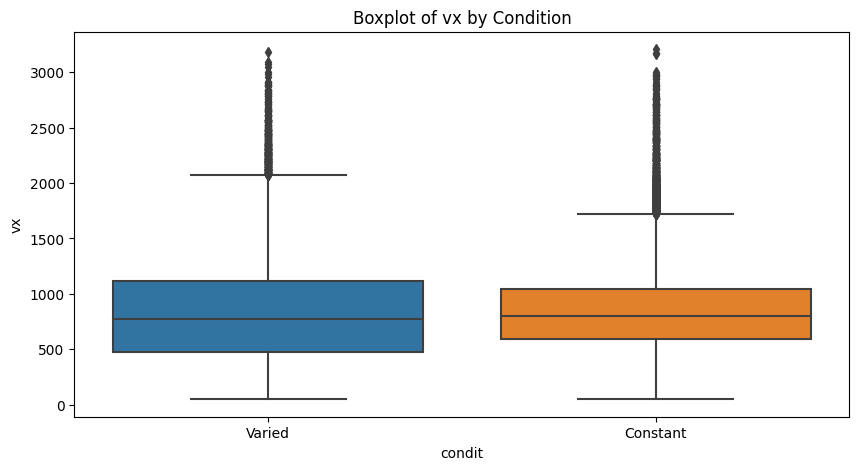

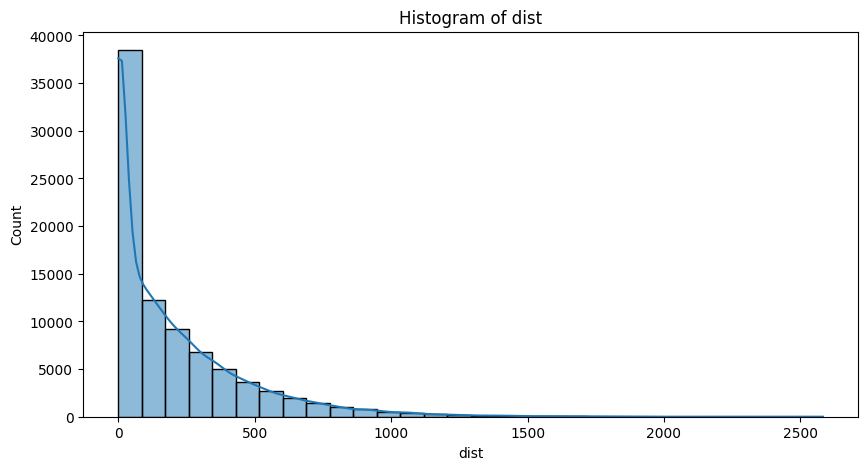

In [5]:
# Data Visualization

# Boxplot for 'vx' variable
plt.figure(figsize=(10, 5))
sns.boxplot(x='condit', y='vx', data=data)
plt.title('Boxplot of vx by Condition')
plt.show()

# Histogram for 'dist' variable
plt.figure(figsize=(10, 5))
sns.histplot(data['dist'], bins=30, kde=True)
plt.title('Histogram of dist')
plt.show()

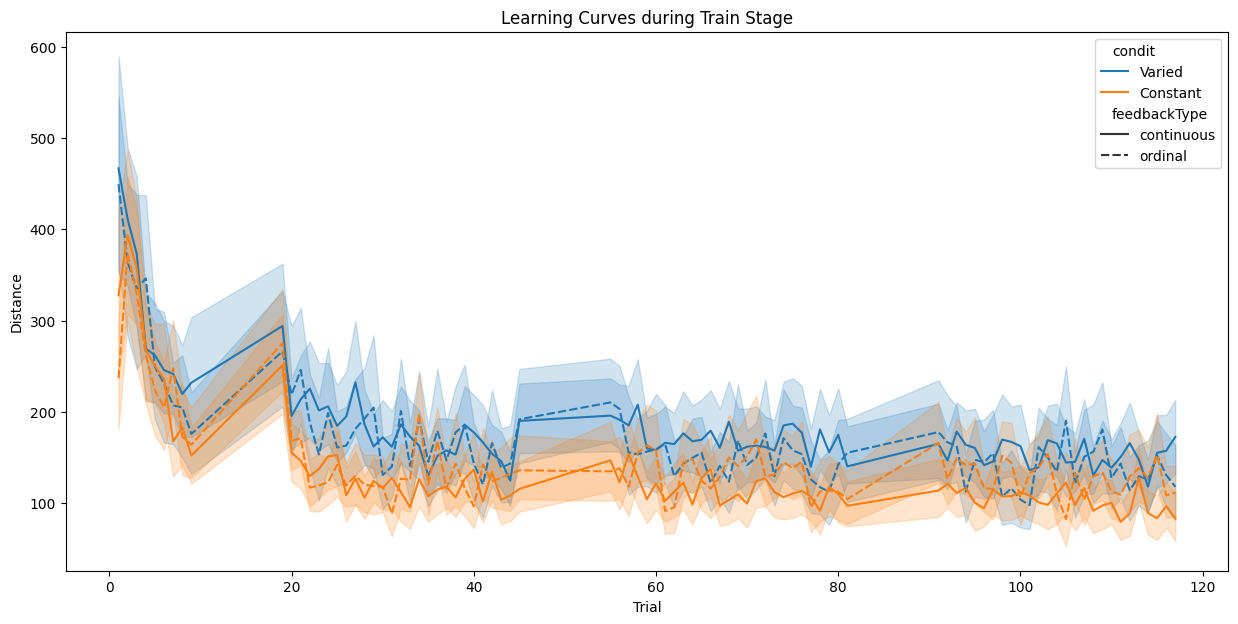

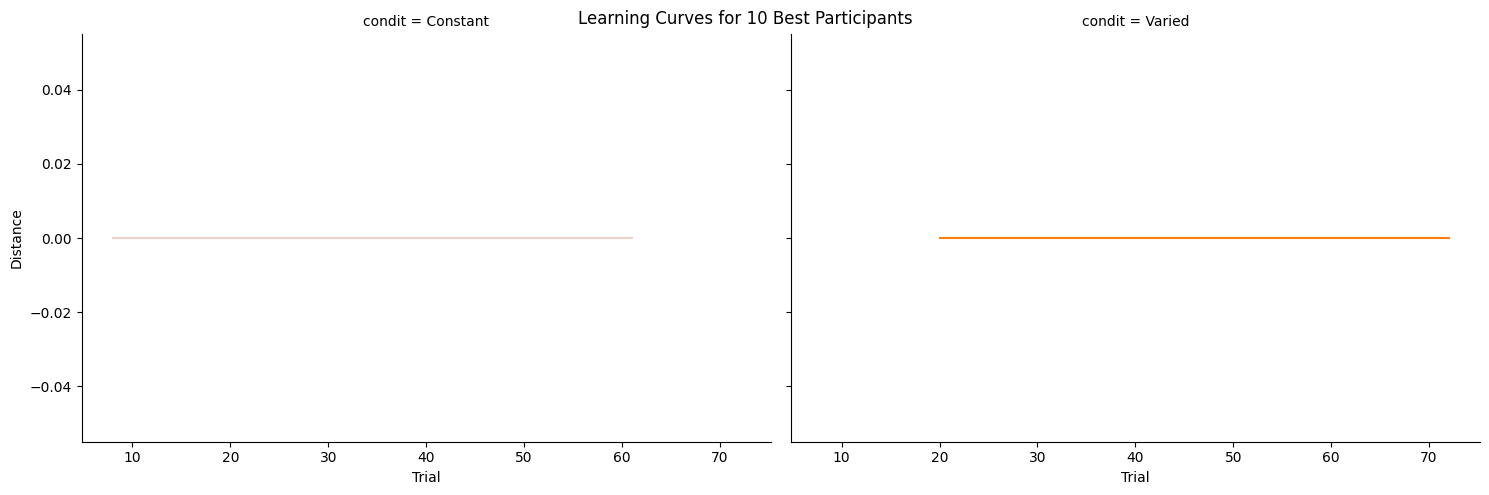

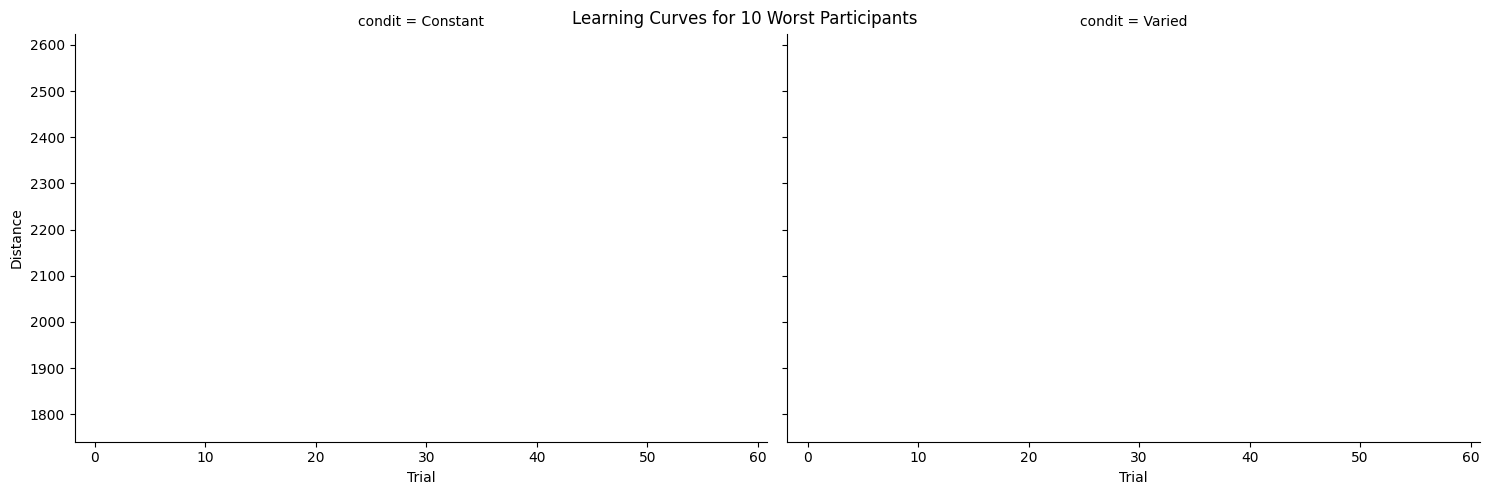

In [8]:
# Filter data for 'train' stage
train_data = data[data['expMode'] == 'train']

# Plot group learning curves
plt.figure(figsize=(15, 7))
sns.lineplot(x='trial', y='dist', hue='condit', style='feedbackType', data=train_data)
plt.title('Learning Curves during Train Stage')
plt.xlabel('Trial')
plt.ylabel('Distance')
plt.show()


# plot individual learning curves (10 best and worst, separately faceted by id)
# sort data by 'condit' and 'dist'
train_data = train_data.sort_values(by=['condit', 'dist'])

# get the 10 best and worst participants
best = train_data.groupby('condit').head(10)
worst = train_data.groupby('condit').tail(10)

# plot the best and worst participants in a facet grid
g = sns.FacetGrid(best, col='condit', col_wrap=2, height=5, aspect=1.5)
g.map(sns.lineplot, 'trial', 'dist', 'id', hue_order=best['id'].unique())
g.set_axis_labels('Trial', 'Distance')
g.fig.suptitle('Learning Curves for 10 Best Participants')
plt.show()

g = sns.FacetGrid(worst, col='condit', col_wrap=2, height=5, aspect=1.5)
g.map(sns.lineplot, 'trial', 'dist', 'id', hue_order=worst['id'].unique())
g.set_axis_labels('Trial', 'Distance')
g.fig.suptitle('Learning Curves for 10 Worst Participants')
plt.show()





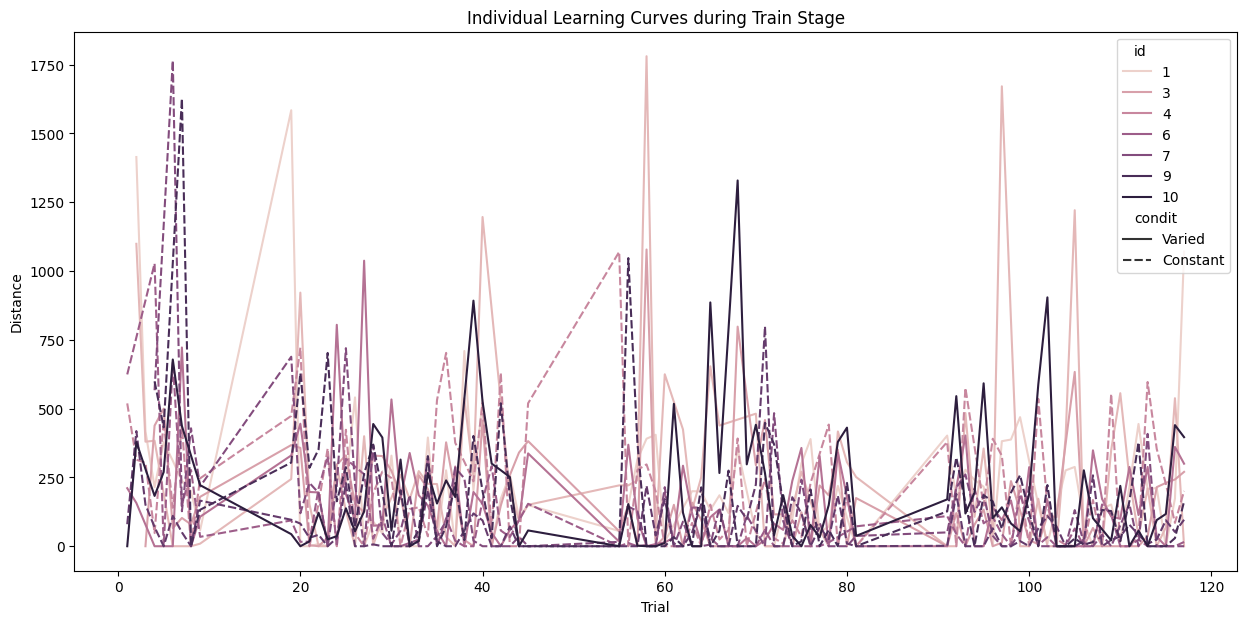

ID: 1, Coefficient: -0.8518514732471292
ID: 2, Coefficient: -0.05525135830721513
ID: 3, Coefficient: -0.9604305337880514
ID: 4, Coefficient: -1.1102772530297935
ID: 5, Coefficient: -0.9061978342615298
ID: 6, Coefficient: -2.0696986561218367
ID: 7, Coefficient: -2.6359512633461573
ID: 8, Coefficient: -0.1962427564805816
ID: 9, Coefficient: -2.7962366037506685
ID: 10, Coefficient: -0.08096812595549112


In [2]:
# Filter data for 'train' stage
train_data = data[data['expMode'] == 'train']

# Plot individual learning curves for a subset of participants
plt.figure(figsize=(15, 7))
subset_ids = train_data['id'].unique()[:10]  # Select a subset of participants
subset_data = train_data[train_data['id'].isin(subset_ids)]
sns.lineplot(x='trial', y='dist', hue='id', style='condit', data=subset_data)
plt.title('Individual Learning Curves during Train Stage')
plt.xlabel('Trial')
plt.ylabel('Distance')
plt.show()

# Fit a linear regression model for each participant
from sklearn.linear_model import LinearRegression
models = {}
for id in train_data['id'].unique():
    participant_data = train_data[train_data['id'] == id]
    X = participant_data['trial'].values.reshape(-1, 1)
    y = participant_data['dist']
    model = LinearRegression().fit(X, y)
    models[id] = model

# Print the coefficients for the first few models
for id, model in list(models.items())[:10]:
    print(f'ID: {id}, Coefficient: {model.coef_[0]}')

In [3]:
# Group-level analysis

# Calculate the mean coefficient for each group
group_data = train_data.groupby(['condit', 'feedbackType', 'catOrder'])['id'].unique().reset_index()
group_data['mean_coefficient'] = group_data['id'].apply(lambda ids: np.mean([models[id].coef_[0] for id in ids]))

# Display the results
group_data

,condit,feedbackType,catOrder,id,mean_coefficient
0,Constant,continuous,orig,"[4, 6, 7, 8, 9, 12, 13, 14, 16, 21, 22, 23, 24...",-1.000930
1,Constant,continuous,rev,"[51, 128, 129, 132, 133, 136, 139, 140, 141, 1...",-0.732474
2,Constant,ordinal,orig,"[126, 130, 131, 176, 178, 179, 180, 182, 187, ...",-0.658954
3,Constant,ordinal,rev,"[301, 303, 306, 308, 309, 311, 313, 314, 316, ...",-0.540911
4,Varied,continuous,orig,"[1, 2, 3, 5, 10, 11, 15, 17, 18, 19, 20, 25, 2...",-0.928048
5,Varied,continuous,rev,"[135, 137, 138, 143, 144, 153, 161, 170, 171, ...",-0.786246
6,Varied,ordinal,orig,"[174, 175, 177, 181, 183, 184, 185, 186, 188, ...",-0.972577
7,Varied,ordinal,rev,"[300, 302, 304, 305, 307, 312, 315, 326, 327, ...",-0.861559


In [4]:
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

# Define exponential and power functions
def exp_func(x, a, b):
    return a * np.exp(-b * x)

def power_func(x, a, b):
    return a * np.power(x, b)

# Define residuals functions for least squares
def exp_residuals(params, x, y):
    return y - exp_func(x, *params)

def power_residuals(params, x, y):
    return y - power_func(x, *params)

# Fit exponential and power models using robust least squares
exp_models = {}
power_models = {}
for id in train_data['id'].unique():
    participant_data = train_data[train_data['id'] == id]
    X = participant_data['trial'].values
    y = participant_data['dist']
    exp_result = least_squares(exp_residuals, (1, 0.1), args=(X, y))
    power_result = least_squares(power_residuals, (1, -0.1), args=(X, y))
    exp_models[id] = exp_result.x
    power_models[id] = power_result.x

# Calculate the mean rate for each model and each group
group_data['mean_exp_rate'] = group_data['id'].apply(lambda ids: np.mean([exp_models[id][1] for id in ids]))
group_data['mean_power_rate'] = group_data['id'].apply(lambda ids: np.mean([power_models[id][1] for id in ids]))

# Display the results
group_data

,condit,feedbackType,catOrder,id,mean_coefficient,mean_exp_rate,mean_power_rate
0,Constant,continuous,orig,"[4, 6, 7, 8, 9, 12, 13, 14, 16, 21, 22, 23, 24...",-1.000930,0.017720,-0.319601
1,Constant,continuous,rev,"[51, 128, 129, 132, 133, 136, 139, 140, 141, 1...",-0.732474,0.064307,-0.346825
2,Constant,ordinal,orig,"[126, 130, 131, 176, 178, 179, 180, 182, 187, ...",-0.658954,0.008043,-0.257767
3,Constant,ordinal,rev,"[301, 303, 306, 308, 309, 311, 313, 314, 316, ...",-0.540911,0.036714,-0.157604
4,Varied,continuous,orig,"[1, 2, 3, 5, 10, 11, 15, 17, 18, 19, 20, 25, 2...",-0.928048,0.006703,-0.184476
5,Varied,continuous,rev,"[135, 137, 138, 143, 144, 153, 161, 170, 171, ...",-0.786246,0.079809,-0.363486
6,Varied,ordinal,orig,"[174, 175, 177, 181, 183, 184, 185, 186, 188, ...",-0.972577,0.006497,-0.201479
7,Varied,ordinal,rev,"[300, 302, 304, 305, 307, 312, 315, 326, 327, ...",-0.861559,0.022976,-0.493725


In [6]:
from sklearn.metrics import mean_squared_error

# Define linear function
def linear_func(x, a, b):
    return a * x + b

def exp_func(x, a, b):
    return a * np.exp(-b * x)

def power_func(x, a, b):
    return a * np.power(x, b)


# Fit linear models for each participant
linear_models = {}
for id in train_data['id'].unique():
    participant_data = train_data[train_data['id'] == id]
    X = participant_data['trial'].values
    y = participant_data['dist']
    linear_params, _ = curve_fit(linear_func, X, y)
    linear_models[id] = linear_params

# Calculate the mean squared error for each model and each participant
mse_linear = {}
mse_exp = {}
mse_power = {}
for id in train_data['id'].unique():
    participant_data = train_data[train_data['id'] == id]
    X = participant_data['trial'].values
    y = participant_data['dist']
    y_pred_linear = linear_func(X, *linear_models[id])
    y_pred_exp = exp_func(X, *exp_models[id])
    y_pred_power = power_func(X, *power_models[id])
    mse_linear[id] = mean_squared_error(y, y_pred_linear)
    mse_exp[id] = mean_squared_error(y, y_pred_exp)
    mse_power[id] = mean_squared_error(y, y_pred_power)

# Calculate the mean MSE for each model and each group
group_data['mean_mse_linear'] = group_data['id'].apply(lambda ids: np.mean([mse_linear[id] for id in ids]))
group_data['mean_mse_exp'] = group_data['id'].apply(lambda ids: np.mean([mse_exp[id] for id in ids]))
group_data['mean_mse_power'] = group_data['id'].apply(lambda ids: np.mean([mse_power[id] for id in ids]))

# Display the results
group_data

,condit,feedbackType,catOrder,id,mean_coefficient,mean_exp_rate,mean_power_rate,mean_mse_linear,mean_mse_exp,mean_mse_power
0,Constant,continuous,orig,"[4, 6, 7, 8, 9, 12, 13, 14, 16, 21, 22, 23, 24...",-1.000930,0.017720,-0.319601,32246.192229,31104.058426,30234.222836
1,Constant,continuous,rev,"[51, 128, 129, 132, 133, 136, 139, 140, 141, 1...",-0.732474,0.064307,-0.346825,28012.611986,26525.391806,25887.219997
2,Constant,ordinal,orig,"[126, 130, 131, 176, 178, 179, 180, 182, 187, ...",-0.658954,0.008043,-0.257767,32157.582495,31937.253717,31375.429777
3,Constant,ordinal,rev,"[301, 303, 306, 308, 309, 311, 313, 314, 316, ...",-0.540911,0.036714,-0.157604,31059.545194,30225.876315,30040.705388
4,Varied,continuous,orig,"[1, 2, 3, 5, 10, 11, 15, 17, 18, 19, 20, 25, 2...",-0.928048,0.006703,-0.184476,51702.448239,51131.206333,50524.265622
5,Varied,continuous,rev,"[135, 137, 138, 143, 144, 153, 161, 170, 171, ...",-0.786246,0.079809,-0.363486,40056.643005,37610.806984,37351.417265
6,Varied,ordinal,orig,"[174, 175, 177, 181, 183, 184, 185, 186, 188, ...",-0.972577,0.006497,-0.201479,51258.882395,50739.313074,50334.862701
7,Varied,ordinal,rev,"[300, 302, 304, 305, 307, 312, 315, 326, 327, ...",-0.861559,0.022976,-0.493725,33327.797025,32654.970362,31570.957928


In [14]:
    # Fit the models to the synthetic data
    synthetic_linear_params, _ = curve_fit(linear_func, X, synthetic_y)
    synthetic_exp_params, _ = curve_fit(exp_func, X, synthetic_y)
    synthetic_power_params, _ = curve_fit(power_func, X, synthetic_y)

    # Perform parameter recovery
    parameter_recovery_results[id] = {
        'linear': parameter_recovery(linear_models[id], synthetic_linear_params),
        'exp': parameter_recovery(exp_models[id], synthetic_exp_params),
        'power': parameter_recovery(power_models[id], synthetic_power_params)
    }

    # Perform model recovery
    model_recovery_results[id] = {
        'linear': model_recovery(lambda x: linear_func(x, *linear_models[id]), lambda x: linear_func(x, *synthetic_linear_params), X),
        'exp': model_recovery(lambda x: exp_func(x, *exp_models[id]), lambda x: exp_func(x, *synthetic_exp_params), X),
        'power': model_recovery(lambda x: power_func(x, *power_models[id]), lambda x: power_func(x, *synthetic_power_params), X)
    }

# Display the results
parameter_recovery_results, model_recovery_results

/var/folders/nv/b0kvr6td64n8jcljvr_zb1280000gt/T/ipykernel_73982/2884530786.py:8: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/var/folders/nv/b0kvr6td64n8jcljvr_zb1280000gt/T/ipykernel_73982/2884530786.py:8: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


({1: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  2: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  3: {'linear': 1.0, 'exp': 1.0, 'power': 0.9999999999999999},
  4: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  5: {'linear': 1.0, 'exp': 0.9999999999999998, 'power': 1.0},
  6: {'linear': 0.9999999999999998, 'exp': 1.0, 'power': 1.0},
  7: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  8: {'linear': 0.9999999999999998, 'exp': 1.0, 'power': 1.0},
  9: {'linear': 0.9999999999999999, 'exp': 1.0, 'power': 1.0},
  10: {'linear': 0.9999999999999998, 'exp': 0.9999999999999998, 'power': 1.0},
  11: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  12: {'linear': 0.9999999999999999, 'exp': 1.0, 'power': 0.9999999999999998},
  13: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  14: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  15: {'linear': 1.0, 'exp': 1.0, 'power': 1.0},
  16: {'linear': 0.9999999999999999, 'exp': 1.0, 'power': 1.0},
  17: {'linear': 1.0, 'exp': 1.0, 'power': 0.9999999999999997},
  18: {'lin

In [18]:
# Define a function to generate synthetic data based on a model and its parameters
def generate_synthetic_data(func, params, x):
    return func(x, *params) + np.random.normal(0, 1, len(x))

# Define a function to perform parameter recovery
def parameter_recovery(original_params, recovered_params):
    return np.corrcoef(original_params, recovered_params)[0, 1]

# Define a function to perform model recovery
def model_recovery(original_model, recovered_model, x):
    original_y = original_model(x)
    recovered_y = recovered_model(x)
    return np.corrcoef(original_y, recovered_y)[0, 1]

# Perform parameter recovery and model recovery simulations
parameter_recovery_results = {}
model_recovery_results = {}
for id in train_data['id'].unique():
    participant_data = train_data[train_data['id'] == id]
    X = participant_data['trial'].values
    y = participant_data['dist']
    synthetic_y = generate_synthetic_data(power_func, power_models[id], X)

    # Fit the models to the synthetic data
    synthetic_linear_params, _ = curve_fit(linear_func, X, synthetic_y)
    synthetic_exp_params, _ = curve_fit(exp_func, X, synthetic_y)
    synthetic_power_params, _ = curve_fit(power_func, X, synthetic_y)

    # Perform parameter recovery
    parameter_recovery_results[id] = {
        'linear': parameter_recovery(linear_models[id], synthetic_linear_params),
        'exp': parameter_recovery(exp_models[id], synthetic_exp_params),
        'power': parameter_recovery(power_models[id], synthetic_power_params)
    }

    # Perform model recovery
    model_recovery_results[id] = {
        'linear': model_recovery(lambda x: linear_func(x, *linear_models[id]), lambda x: linear_func(x, *synthetic_linear_params), X),
        'exp': model_recovery(lambda x: exp_func(x, *exp_models[id]), lambda x: exp_func(x, *synthetic_exp_params), X),
        'power': model_recovery(lambda x: power_func(x, *power_models[id]), lambda x: power_func(x, *synthetic_power_params), X)
    }

# Display the results
#parameter_recovery_results, model_recovery_results

# display first 5 lines of parameter recovery results
pd.DataFrame(parameter_recovery_results).T.head()


# display first 5 lines of model recovery results
pd.DataFrame(model_recovery_results).T.head()

/var/folders/nv/b0kvr6td64n8jcljvr_zb1280000gt/T/ipykernel_73982/2884530786.py:8: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/var/folders/nv/b0kvr6td64n8jcljvr_zb1280000gt/T/ipykernel_73982/2884530786.py:8: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)
/usr/local/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,linear,exp,power
1,1.0,0.994550,1.0
2,1.0,0.999802,1.0
3,1.0,0.999663,1.0
4,1.0,0.999953,1.0
5,1.0,0.998842,1.0


In [20]:
# Define a function to perform model recovery
def model_recovery(original_model, recovered_model, x):
    original_y = original_model(x)
    recovered_y = recovered_model(x)
    return np.corrcoef(original_y, recovered_y)[0, 1]

# Perform model recovery simulations
model_recovery_results = {}
for id in train_data['id'].unique():
    participant_data = train_data[train_data['id'] == id]
    X = participant_data['trial'].values
    y = participant_data['dist']
    synthetic_y = generate_synthetic_data(power_func, power_models[id], X)

    # Fit the models to the synthetic data
    synthetic_linear_params, _ = curve_fit(linear_func, X, synthetic_y)
    synthetic_exp_params, _ = curve_fit(exp_func, X, synthetic_y)
    synthetic_power_params, _ = curve_fit(power_func, X, synthetic_y)

    # Perform model recovery
    model_recovery_results[id] = {
        'linear': model_recovery(lambda x: linear_func(x, *linear_models[id]), lambda x: linear_func(x, *synthetic_linear_params), X),
        'exp': model_recovery(lambda x: exp_func(x, *exp_models[id]), lambda x: exp_func(x, *synthetic_exp_params), X),
        'power': model_recovery(lambda x: power_func(x, *power_models[id]), lambda x: power_func(x, *synthetic_power_params), X)
    }

# Display the results, (truncate to 5 rows)
pd.DataFrame(model_recovery_results).T.head()



/var/folders/nv/b0kvr6td64n8jcljvr_zb1280000gt/T/ipykernel_73982/2884530786.py:8: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/var/folders/nv/b0kvr6td64n8jcljvr_zb1280000gt/T/ipykernel_73982/2884530786.py:8: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


,linear,exp,power
1,1.0,0.994584,1.0
2,1.0,0.999802,1.0
3,1.0,0.999671,1.0
4,1.0,0.999950,1.0
5,1.0,0.998847,1.0
